# Formalities

- Work together in groups of four people. Sign up for a group in Studium.

- The exercise is examinated by oral examination during the exercise session 3 OR by handing in a
written report with the group’s answers to the questions in Studium. Name your report 
**Lab2_LastName1_LastName2_LastName3** . If you choose your work to be evaluated during
exercise session 3, make sure all the group members are present and prepare a report with the main
results to simplify the evaluation, otherwise, you will be asked to submit a full report on Studium.

# 1. Convolution

There are several ways to apply convolutions to an image. You may use OpenCV `cv2.filter2D` function to apply a filter with a custom kernel provided as 2d array or use some of the predefined filters like `cv2.GaussianBlur`. Other packages also have convolution operations, like NumPy `numpy.convolve` or SciPy `scipy.signal.convolve`. 
Be careful with data types - it may be a good idea to do processing of the images in floating point instead of uin8 to avoid different overflow artifacts.

#### Q1. Examine different filter kernels (smoothing & sharpening) on an image
* Examine at least 3 different filter kernels, among which there should be at least one sharpening (edge enhancing) and one smoothing filter and apply them in different sizes to the image cameraman.png, e.g. sizes 3 × 3, 7 × 7 and 31 × 31. Note that some filters may only available in one size.
* Include at least three figures in your report. One showing the original image, one figure showing the image after
sharpening, and one figure showing the image after smoothing.
* For each filter, explain
what the filter does to the image, and explain the effect of the different filter sizes.

**A1.** 


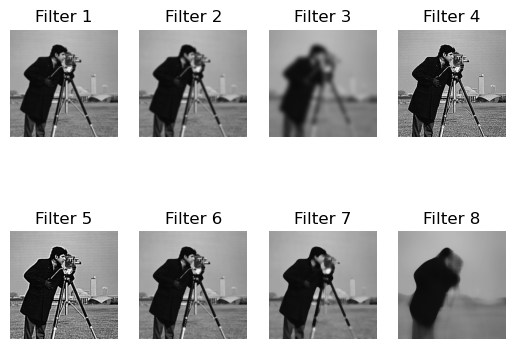

In [9]:
#A1
import cv2
import numpy as np
import matplotlib.pyplot as plt

I = cv2.imread('lab2/images/cameraman.png', cv2.IMREAD_GRAYSCALE)

I1 = I
'''
kernels = { 'gauss3x3': cv2.GaussianBlur((3,3), 1, sigmaX = 0), 
            'gauss7x7' : cv2.GaussianBlur((7,7), 1, sigmaX = 0), 
            'gauss31x31' : cv2.GaussianBlur((31,31), 1, sigmaX = 0),
            'sharp3x3' : np.array([[0, -1, 0],
                                 [-1, 5, -1],
                                 [0, -1, 0]]),
            'sharp5x5': np.array([[-1, -1, -1, -1, -1],
                                 [-1, 2, 2, 2, -1],
                                 [-1, 2, 9, 2, -1],
                                 [-1, 2, 2, 2, -1],
                                 [-1, -1, -1, -1, -1]]) / 9,
            'median3x3': cv2.medianBlur(I, 3),
            'median7x7': cv2.medianBlur(I, 7),
            'median31x31': cv2.medianBlur(I, 31)
            }
'''

res = []

res.append(cv2.GaussianBlur(I, (3,3), sigmaX = 0))
res.append(cv2.GaussianBlur(I, (7,7), sigmaX = 0))
res.append(cv2.GaussianBlur(I, (31,31), sigmaX = 0))
res.append(cv2.filter2D(I, -1, np.array([[0, -1, 0],
                                        [-1, 5, -1],
                                        [0, -1, 0]])))
res.append(cv2.filter2D(I, -1, np.array([[-1, -1, -1, -1, -1],
                                        [-1, 2, 2, 2, -1],
                                        [-1, 2, 9, 2, -1],
                                        [-1, 2, 2, 2, -1],
                                        [-1, -1, -1, -1, -1]]) / 9))
res.append(cv2.medianBlur(I, 3))
res.append(cv2.medianBlur(I, 7))
res.append(cv2.medianBlur(I, 31))


for i in range(len(res)):
    plt.subplot(2, 4, i+1)
    plt.imshow(res[i], cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(f'Filter {i+1}')


#### Q2. Are the filters with filter kernels ’average’, disk’ and gaussian’ examples of low-pass, band-pass or high-pass filters??

**A2**:
These are all lowpass filters. In the context of images high frequencies are big differences in pixel values while low frequencies are smoother changes. (ex. lowgfrequency: gradients, highfrequency: texture and edges.)

These filters smooth out the images meaning keeping the low frequency components, i.e they are low pass. letting the low frequency components pass.

#### Q3. Demonstrate how you can synthesize low-pass, band-pass and high-pass filtered images using simple arithmetics and filter kernels mentioned in Question 2.

**A3**:


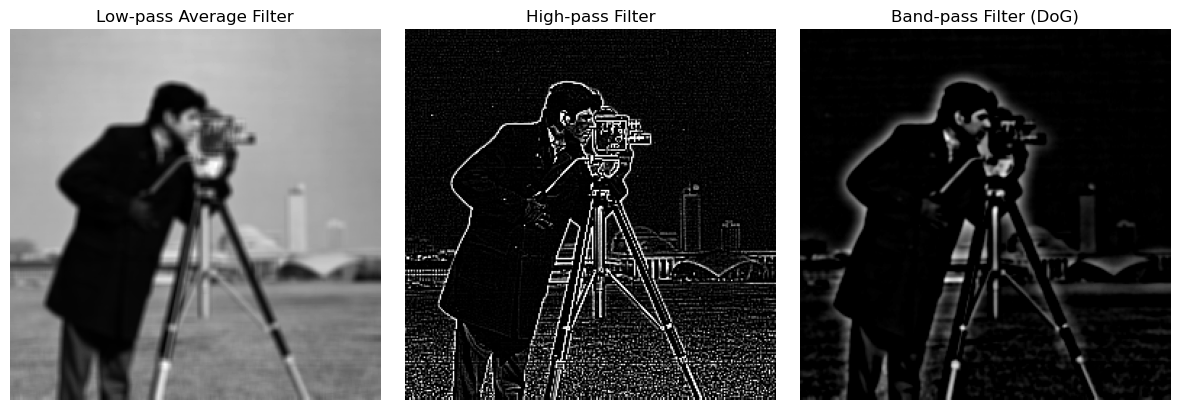

In [13]:
#A3

# lowpass
# Average filter
avg_kernel = np.ones((5, 5), np.float32) / 25
lowpass_avg = cv2.filter2D(I, -1, avg_kernel)

# High-pass filter
highpass_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], np.float32)

highpass2 = cv2.filter2D(I, -1, highpass_kernel)


lp_small = cv2.GaussianBlur(I, (5, 5), 1)
lp_large = cv2.GaussianBlur(I, (21, 21), 6)

# Band-pass
bandpass = cv2.subtract(lp_small, lp_large)

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(lowpass_avg, cmap='gray')
plt.title('Low-pass Average Filter')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(highpass2, cmap='gray')
plt.title('High-pass Filter')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(bandpass, cmap='gray')
plt.title('Band-pass Filter (DoG)')
plt.axis('off')
plt.tight_layout()
plt.show()


# 2. The Sobel Filter

#### Q4. Use this functionality to demonstrate Sobel filtering on cameraman.png and wagon.png
You will need to do some arithmetics, since the Sobel filter is not a linear filter and cannot be 
implemented using convolution alone
You may construct Sobel filters manually from a 2d array or using `cv2.Sobel`.

**A4**


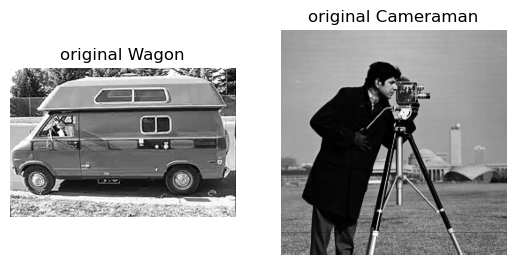

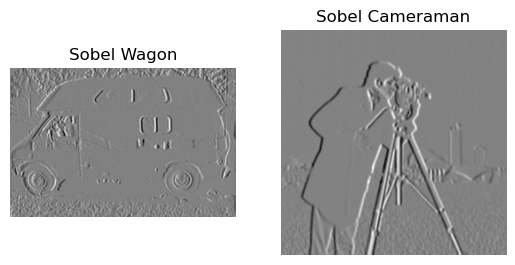

In [18]:
#A4
Iwagon = cv2.imread('lab2/images/wagon.png', cv2.IMREAD_GRAYSCALE)
Icameraman = I

I1 = cv2.Sobel(Iwagon, cv2.CV_64F, 1, 0, ksize=5)
I2 = cv2.Sobel(Icameraman, cv2.CV_64F, 1, 0, ksize=5)

plt.subplot(1, 2, 1)
plt.imshow(Iwagon, cmap='gray')
plt.title('original Wagon')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(Icameraman, cmap='gray')
plt.title('original Cameraman')
plt.axis('off')
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(I1, cmap='gray')
plt.title('Sobel Wagon')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(I2, cmap='gray')
plt.title('Sobel Cameraman')
plt.axis('off')
plt.show()


# 3. The Median Filter

You may use `cv2.medianBlur` from the OpenCV package or use your own implementation, which will be one of the tasks below.

#### Q5. Open the image wagon shot noise.png. Perform median filtering on the image using different sizes of the filter masks.

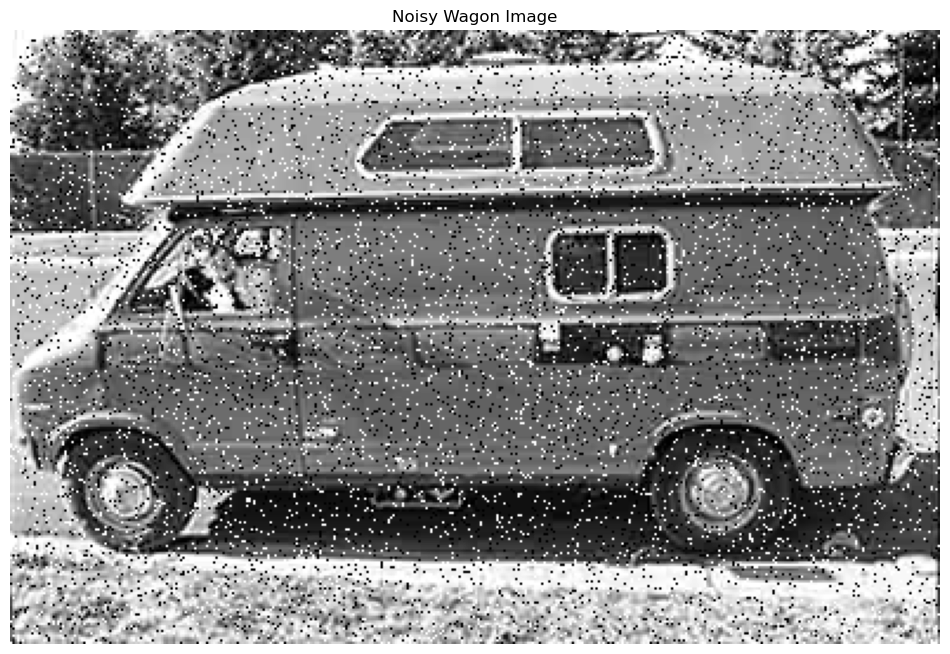

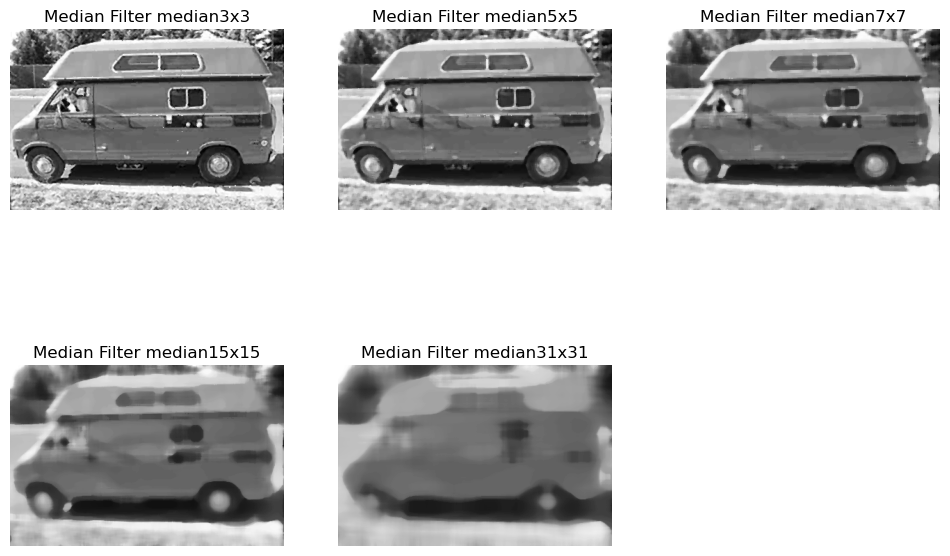

In [20]:
#A5
Iwagon_noise = cv2.imread('lab2/images/wagon_shot_noise.png', cv2.IMREAD_GRAYSCALE)

r = {}

r['median3x3'] = cv2.medianBlur(Iwagon_noise, 3)
r['median5x5'] = cv2.medianBlur(Iwagon_noise, 5)
r['median7x7'] = cv2.medianBlur(Iwagon_noise, 7)
r['median15x15'] = cv2.medianBlur(Iwagon_noise, 15)
r['median31x31'] = cv2.medianBlur(Iwagon_noise, 31)

plt.figure(figsize=(12, 8))
plt.imshow(Iwagon_noise, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy Wagon Image')
plt.show()

plt.figure (figsize=(12, 8))
for t,i in r.items():
    plt.subplot(2, 3, list(r.keys()).index(t)+1)
    plt.imshow(i, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(f'Median Filter {t}')


#### Q6. Compare visually the effect of median filtering to the effect of mean and Gauss filtering. Explain the differences on the image wagon shot noise.png. How does median filtering work compared to mean and Gauss filtering?

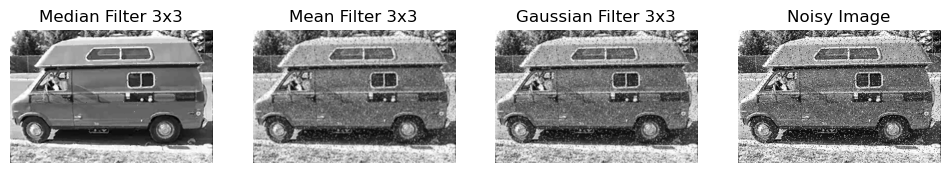

In [22]:
#A6
I_median_filter = cv2.medianBlur(Iwagon_noise, 3)

I_mean_filter = cv2.blur(Iwagon_noise, (3,3))

I_gauss_filter = cv2.GaussianBlur(Iwagon_noise, (3,3), sigmaX = 0)

plt.figure(figsize=(12, 8))
plt.subplot(1, 4, 1)
plt.imshow(I_median_filter, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Median Filter 3x3') 
plt.subplot(1, 4, 2)
plt.imshow(I_mean_filter, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Mean Filter 3x3')
plt.subplot(1, 4, 3)
plt.imshow(I_gauss_filter, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Gaussian Filter 3x3')
plt.subplot(1, 4, 4)
plt.imshow(Iwagon_noise, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Noisy Image')
plt.show()

**A6**
Looking at the filtered images it's seen that the median filter has reduced noise more efffectivly 

#### Q7. In general the median filter is more time consuming, why?

**A7**


#### Q8. Implement your own code for 3x3 median filtering. Use for instance two nested for loops to iterate your filter for every neighborhood in the image. The exact behavior on the borders is not so important for this exercise and you may cut some corners here if it helps you.

In [ ]:
#A8


# 4. Fast Fourier Transform (FFT)

In this section, we transition to frequency domain analysis and filtering using the Fourier transform. We will use NumPy’s FFT functions. `np.fft.fft2` computes the 2D FFT, and `np.fft.fftshift` centers the zero-frequency component. Similarly, `np.fft.ifft2` and `np.fft.ifftshift` is used for inverse FFT and centering back.

Lets open the image lines.png and transform the image using the FFT and display the logarithm of the 
magnitude of the Fourier component:s

In [ ]:
lines_img = cv2.imread('lab2/images/lines.png', cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(lines_img.astype(np.float32))
f_shifted = np.fft.fftshift(f)  # center the low frequencies
magnitude = np.abs(f_shifted)
log_mag = np.log(magnitude + 1e-5)

plt.figure(figsize=(10,5))
plt.subplot(2,1,1), plt.imshow(lines_img, cmap='gray'), plt.title("Lines Image (spatial)"), plt.axis('off')
plt.subplot(2,1,2), plt.imshow(log_mag, cmap='gray'), plt.title("FFT log-magnitude"), plt.axis('off')
plt.show()

Can you see a relationship between the lines in the Fourier spectra and the lines in the original image?

Hint: Figurebelow1 shows a few example images, and their corresponding Fourier spectra.


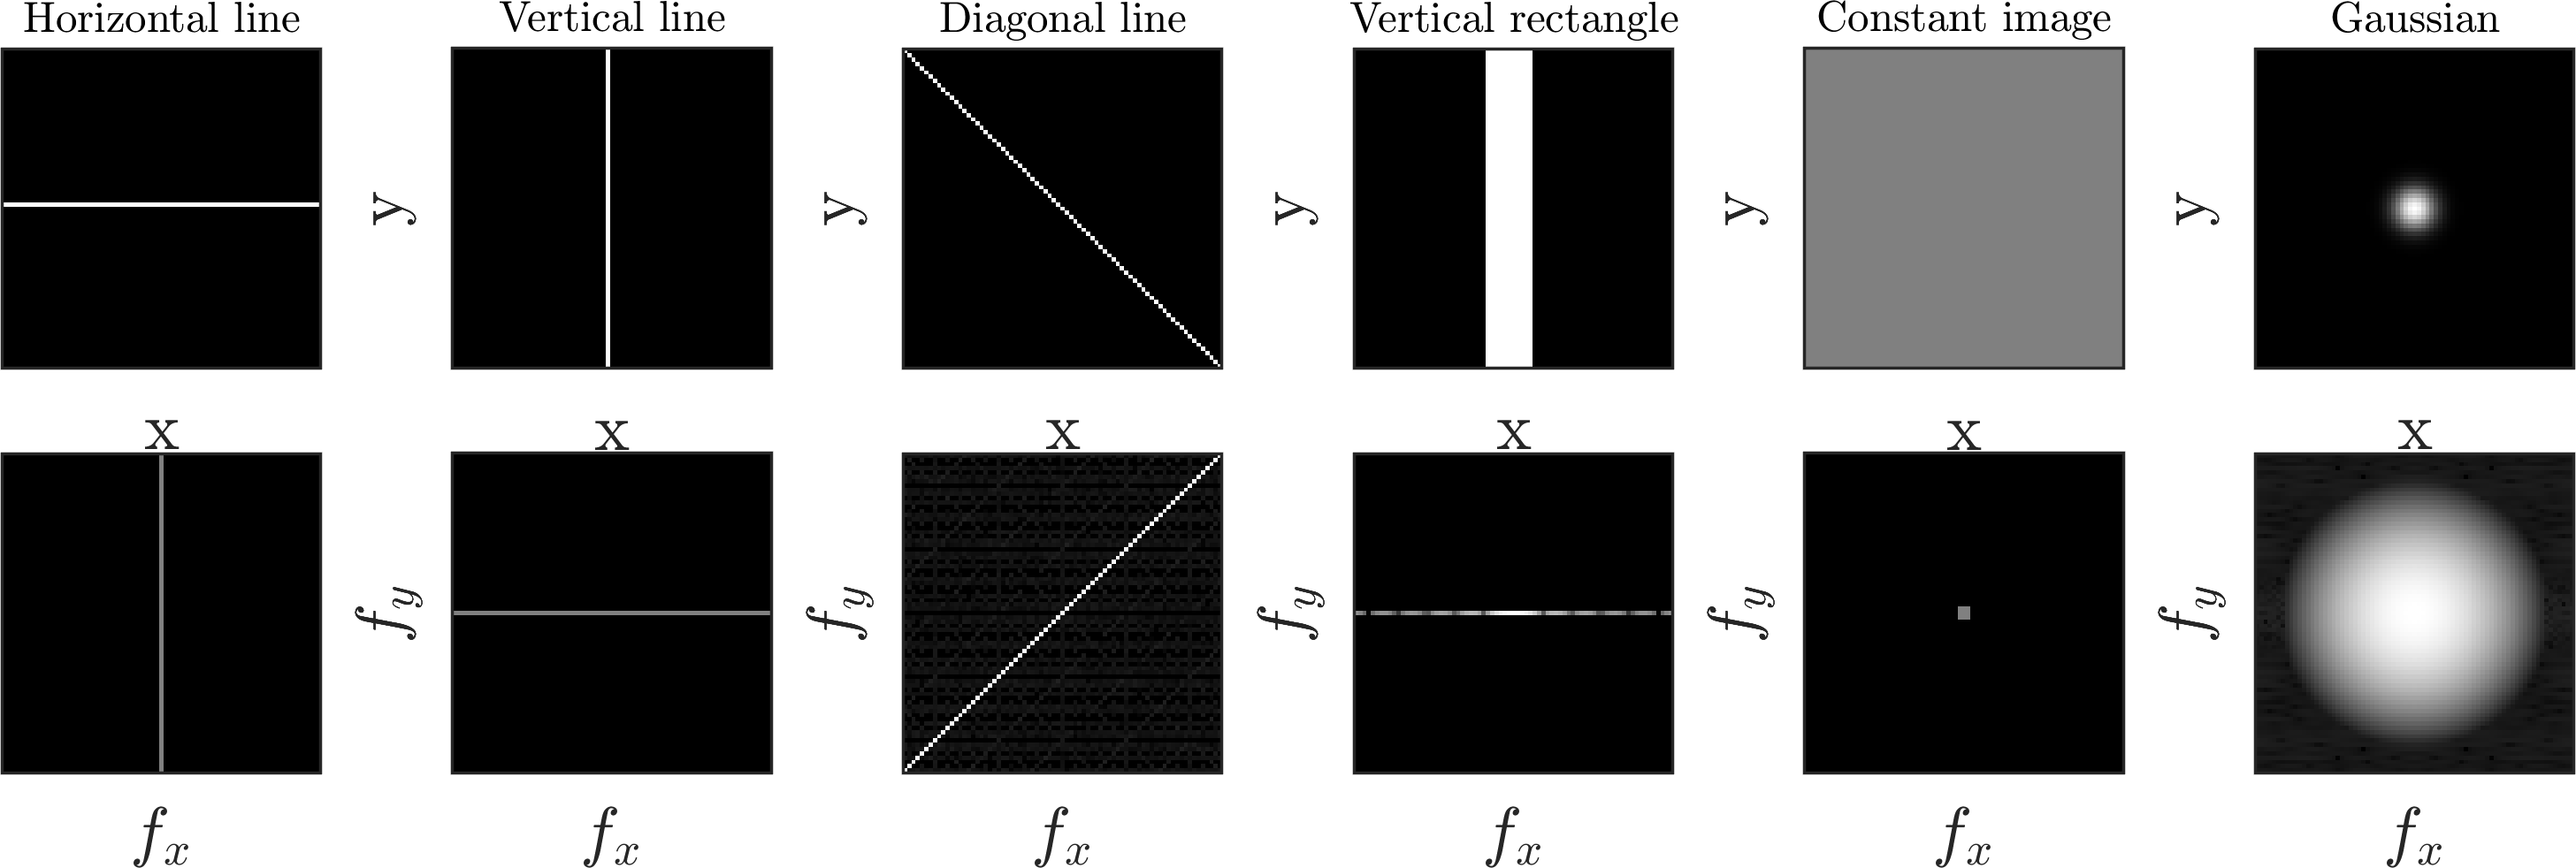

#### Q9. Repeat the same procedure with the image cameraman.png. Comment on the spectrum that you see and compare it to the ordinary representation of the image. You may also try other images, for example circle.png or rectangle.png.

In [ ]:
#A9


**A9**


#### Q10. FFT of a small odd-length signal and symmetry properties

Experiment with FFT of an odd-length signal (image) of small length. For creating such a signal (image) use the command `f = np.fft.fftshift(np.fft.fft2(np.random.rand(1, 5)))`. What are some characteristic features of the centre value in f, i.e, `f[0,2]`? What are some characteristic features of the pair `f[0,1]` and `f[0,3]`, as well as the pair `f[0,0]` and `f[0,4]`?

Do you notice any symmetry in these values? Do you notice the same symmetry in an even length vector?

Now we want to perform some filtering in the Fourier domain. Start by putting the frequency in `f[0,1]` to zero, i.e, `f[0,1] = 0`, and then transform the frequency vector back to an image using `im = np.fft.ifft2(np.fft.ifftshift(f))` Is the resulting image real valued or complex valued? 

Now, try to put both `f[0,1] = 0`, and `f[0,3] = 0` and do the IFFT. Is the resulting image real valued or complex valued? How should you zero out the
frequencies to get a real valued image when doing the IFFT? 
For these signals, or very small “images”, we recommend that you inspect the actual numbers by printing out the matrix instead of viewing it with imshow.

In [ ]:
#A10


#### Q11. Creating a low-pass version of cameraman.png by modifying its FFT

Now modify the FFT representation of cameraman.png, by setting certain frequencies to 0, to create a low-pass version of the image. Use a circular filter for best result, but feel free to simplify the task a square pattern of your filter. You may blank out a part of a matrix using slices, e.g. `A[20:30, 50:60] = 0`. Theoretically, result image should be real valued after performing ifft2 if everything is done correctly, but this may be not true due to floating-point precision errors. Explicitly check that the resulting image is either of a real type or the imaginary part is negligibly small, like this: `Assert np.max(np.abs(np.imag(I))) <1e-10 `.

Pay attention to the symmetry in the complex value that you observed in the previous exercise. You are **not allowed to use the functions real or abs or similar ways** to force a real valued result before verifying that the resulting image is real or the imaginary part is small as explained above. In your report, clearly explain your algorithm or include your code and comment.

In [ ]:
#A11


# Q12. Removing pattern noise using frequency-domain filtering

Create a filter in the frequency-domain that suppresses the pattern in `freqdist.png`, but leaves the rest of the image as intact as possible. What does the filter look like? What do you see in the filtered image? Like the previous question, the result image should be real valued (or with negligible imaginary part) after performing ifft2. You are **not allowed to use the functions real or abs or similar ways** to force a real valued result before verifying that the resulting image is real or the imaginary part is small as explained above in Q11.

In [ ]:
#A12
